In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('car data.csv')

In [3]:
dataset.shape

(301, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
cat_columns = []
num_columns = []
cat_columns.append('Year') 

for col in dataset.columns:
    if dataset[col].dtype in ['object']:
        cat_columns.append(col)
    else:
        num_columns.append(col)
        
print(cat_columns)
num_columns

['Year', 'Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [9]:
le = LabelEncoder()
for column in cat_columns:
    dataset[column] = le.fit_transform(dataset[column])
    
dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,11,3.35,5.59,27000,2,0,1,0
1,93,10,4.75,9.54,43000,1,0,1,0
2,68,14,7.25,9.85,6900,2,0,1,0
3,96,8,2.85,4.15,5200,2,0,1,0
4,92,11,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,13,9.50,11.60,33988,1,0,1,0
297,66,12,4.00,5.90,60000,2,0,1,0
298,69,6,3.35,11.00,87934,2,0,1,0
299,69,14,11.50,12.50,9000,1,0,1,0


In [10]:
features = dataset.drop(columns=['Selling_Price'])

target = dataset['Selling_Price']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [12]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(features_train, target_train)
model.score(features_test, target_test)


0.9721184767545598

In [13]:
prediction = model.predict(features_test)

In [14]:
r2 = r2_score(target_test, prediction)
r2

0.9721184767545598

In [15]:
mae = mean_absolute_error(target_test, prediction)
mae

0.5519138157894726

In [16]:
rmse = root_mean_squared_error(target_test, prediction)
rmse

0.8752287898067436

In [17]:
cross_val_score(model, features_test, target_test, cv=5).mean()

0.805951028203679

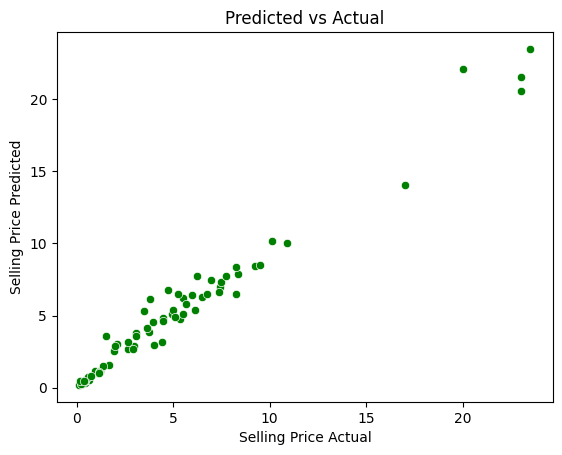

In [18]:
sns.scatterplot(x=target_test, y=prediction, color='Green')
plt.xlabel('Selling Price Actual')
plt.ylabel('Selling Price Predicted')
plt.title('Predicted vs Actual')
plt.show()

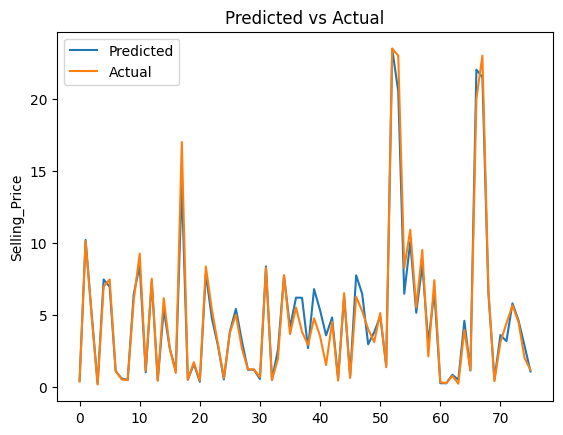

In [19]:
sns.lineplot(prediction, label='Predicted')
sns.lineplot(target_test.reset_index(drop=True), label='Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

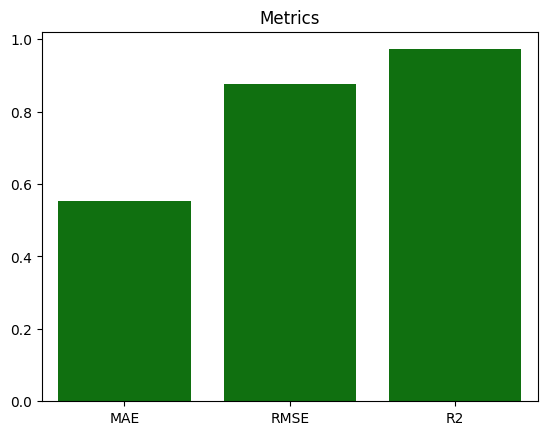

In [20]:
metrics = {'MAE':mae, 'RMSE':rmse, 'R2':r2}
sns.barplot(metrics, color='Green')
plt.title('Metrics')
plt.show()

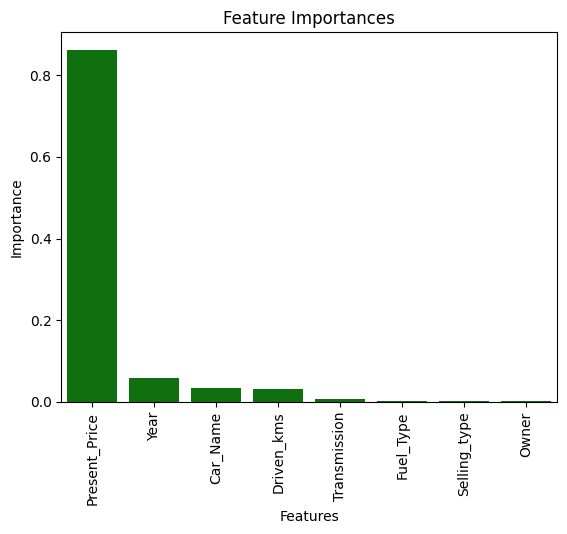

In [21]:
importances = model.feature_importances_
features_column = features.columns

df_impo = pd.DataFrame({'Importance':importances, 'Features':features_column}).sort_values(by='Importance', ascending=False)
sns.barplot(df_impo, x='Features', y='Importance', color='green')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

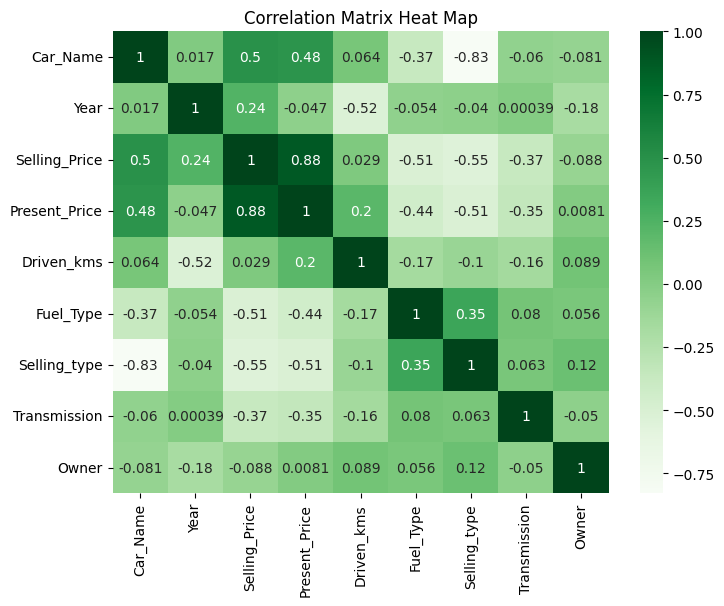

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix Heat Map')
plt.show()